<a href="https://colab.research.google.com/github/jshetty0408/Bank_Churn_Prediction/blob/main/ANN_Bank_Churn_Prediction_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
import seaborn as sns
%matplotlib inline 

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [5]:
project_path = 'gdrive/My Drive/Colab Notebooks/ANN/Project/'

In [6]:
dataset_file = project_path + 'bank.csv'

In [7]:
#Reading the dataset
data = pd.read_csv(dataset_file)

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data.shape

(10000, 14)

In [ ]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
round(data.isna().sum()*100/data.shape[0],2) #check for % null values #No null values

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [11]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data['Surname'].nunique()

2932

In [13]:
data['Geography'].nunique()

3

In [15]:
data_1 = data.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [16]:
data_1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data_2 = pd.get_dummies(data_1,drop_first=True)

In [18]:
data_2.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
data_2 = data_2.astype('float32')

In [20]:
data_2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [21]:
X = data_2[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']]
Y = data_2['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [22]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.556     , 0.14864865, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       [0.55200005, 0.14864865, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.52400005, 0.39189193, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.64400005, 0.36486486, 0.90000004, ..., 0.        , 0.        ,
        0.        ],
       [0.62600005, 0.28378376, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.826     , 0.32432434, 0.6       , ..., 1.        , 0.        ,
        1.        ]], dtype=float32)

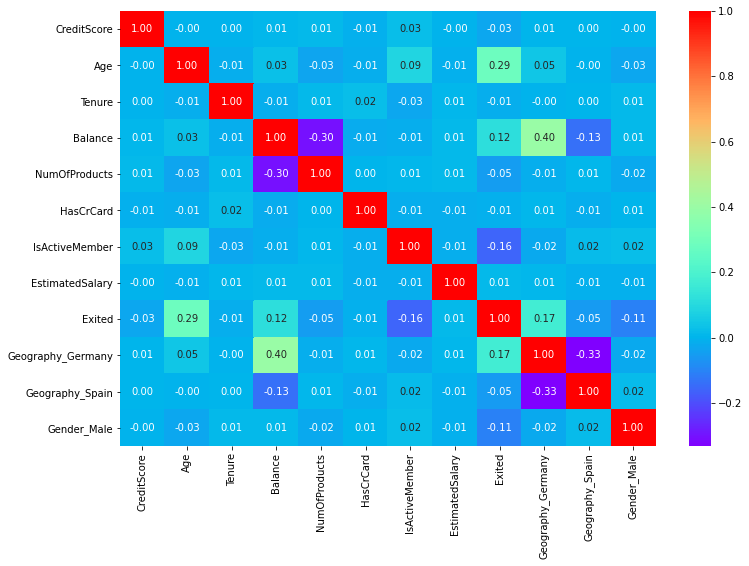

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(data_2.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

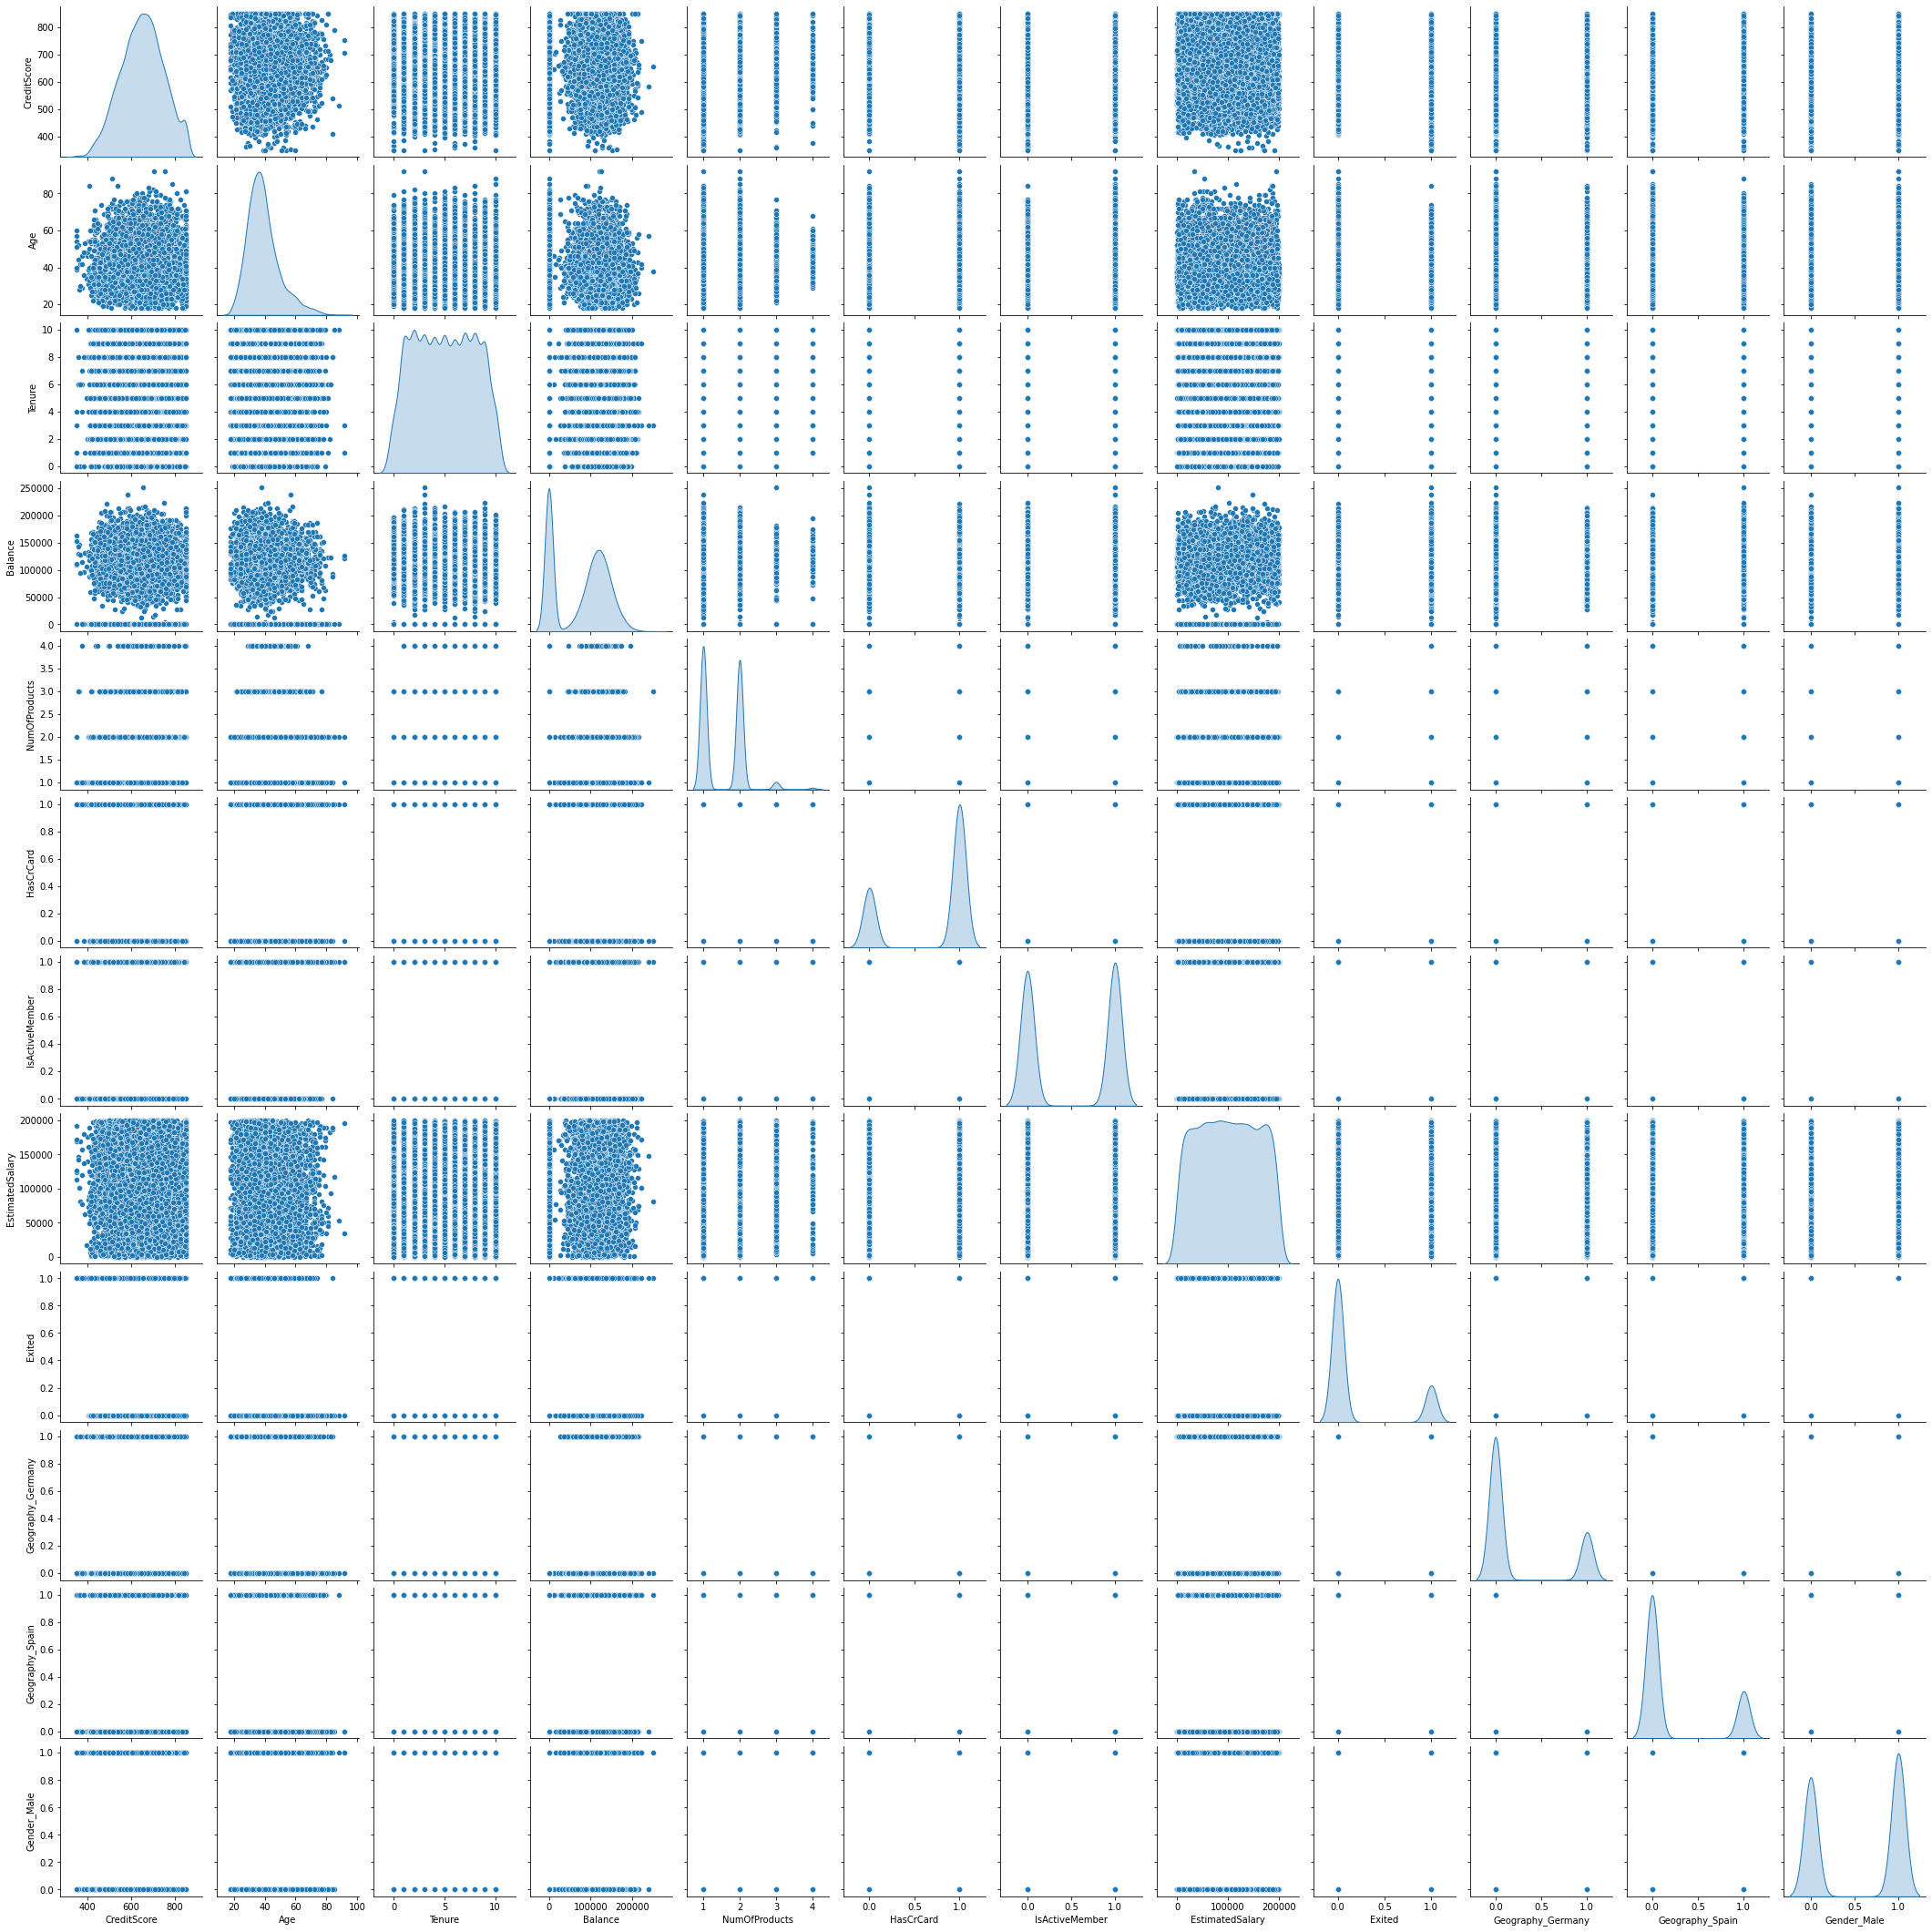

In [24]:
sns.pairplot(data_2 ,diag_kind='kde')

In [48]:
model = Sequential()


In [49]:
model.add(Dense(8, input_shape = (11,), activation = 'relu'))
#model.add(Dense(30, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
sgd = optimizers.Adam(lr = 0.001)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 96        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train, y_train, batch_size = 256, epochs = 1000, verbose = 1)

Epoch 1/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8558
Epoch 2/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8564
Epoch 3/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8566
Epoch 4/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3460 - accuracy: 0.8565
Epoch 5/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8554
Epoch 6/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8561
Epoch 7/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.8564
Epoch 8/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8568
Epoch 9/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 0.8564
Epoch 10/1000
32/32 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8572

In [59]:
results = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8675


In [60]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.33529627323150635, 0.8675000071525574]


In [61]:
Y_pred_cls = (model.predict(X_test) > 0.5).astype("int32")
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

63/63 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8675
Accuracy Model1 (Dropout): 0.8675000071525574
Recall_score: 0.5228915662650603
Precision_score: 0.7640845070422535
F-score: 0.6208869814020029


array([[1518,   67],
       [ 198,  217]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')